# Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import set_config; set_config(display='diagram')
from IPython.display import display, HTML
display(HTML("<style>.container { width:88% !important; }</style>"))

In [3]:
from scipy import stats

# sklearn preproc
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import make_scorer, mean_squared_log_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold

# Data Import

In [4]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Define X and y

In [5]:
X = df.drop(columns=['Id','SalePrice'])
y = df['SalePrice']

In [6]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

## Categorical feature selection

In [7]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [8]:
feat_categorical_unique = X.select_dtypes('object').nunique()

In [9]:
feat_categorical_unique.sum()

252

<AxesSubplot:ylabel='Frequency'>

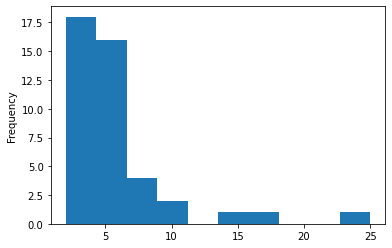

In [10]:
feat_categorical_unique.plot(kind='hist')

In [11]:
feat_categorical_small = feat_categorical_unique[feat_categorical_unique<7].index.tolist()

In [12]:
len(feat_categorical_small)

34

# Preproc Baseline

## Define pipelines

In [13]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler()
)

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=['int64','float64'])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder='drop'
)

preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f41421afa90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ign...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'BldgType', 'RoofStyle',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'FireplaceQu', 'GarageType', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive', ...])])

In [14]:
preprocessed = preproc_baseline.fit_transform(X)
shape_preproc_baseline = preprocessed.shape
shape_preproc_baseline

(1460, 183)

In [15]:
pipe_baseline = make_pipeline(preproc_baseline, DecisionTreeRegressor())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f41421afa90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencod...
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'RoofStyle',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'FireplaceQu', 'GarageType',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive', ...])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

## Define rmsle scorer

In [16]:
rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5)

rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)

## cross validate

In [17]:
cv_results = cross_validate(pipe_baseline, X, y, cv=5, scoring=rmsle)
cv_results

{'fit_time': array([0.03934288, 0.03130889, 0.03134608, 0.03474617, 0.03391767]),
 'score_time': array([0.00583935, 0.00557709, 0.00529099, 0.00581217, 0.00604367]),
 'test_score': array([0.21003292, 0.22626617, 0.18735105, 0.18880275, 0.22222289])}

In [18]:
score_baseline = cv_results['test_score'].mean()
score_baseline

0.20693515214887018

# baseline prediction

In [19]:
X_test = pd.read_csv('data/test.csv')
X_test_ids = X_test['Id']
X_test = X_test.drop(columns=['Id'])

pipe_baseline.fit(X,y)
y_pred_baseline = pipe_baseline.predict(X_test)
y_pred_baseline

array([129000., 157900., 210000., ..., 139000., 108000., 219500.])

In [20]:
results = pd.concat([X_test_ids, pd.Series(y_pred_baseline, name='SalePrice')], axis=1)
results.head(3)

,Id,SalePrice
0,1461,129000.0
1,1462,157900.0
2,1463,210000.0


In [21]:
results.to_csv('data/submission_baseline.csv', header=True, index=False)

# Iterations

## preprocessing iteration

### preproc_ordinal

In [22]:
set(X.select_dtypes('object').columns)

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [23]:
set(feat_categorical_small)

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'PavedDrive',
 'PoolQC',
 'RoofStyle',
 'SaleCondition',
 'Street',
 'Utilities'}

In [24]:
cond_qual = ['missing','Po','Fa','TA','Gd','Ex']

feat_ordinal_dict = {'Alley': ['missing','Grvl','Pave'],
                     'BsmtCond': cond_qual,
                     'BsmtExposure': ['missing','No','Mn','Av','Gd'],
                     'BsmtFinType1': ['missing','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                     'BsmtFinType2': ['missing','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                     'BsmtQual': ['missing','Po','Fa','TA','Gd','Ex'],
                     'CentralAir': ['missing','N','Y'],
                     'ExterCond': cond_qual,
                     'ExterQual': cond_qual,
                     'Fence': ['missing','MnWw','GdWo','MnPrv','GdPrv'],
                     'FireplaceQu': cond_qual,
                     'GarageCond': cond_qual,
                     'GarageFinish': ['missing','Unf','RFn','Fin'],
                     'GarageQual': cond_qual,
                     'HeatingQC': cond_qual,
                     'KitchenQual': cond_qual,
                     'LandSlope': ['missing','Sev','Mod','Gtl'],
                     'LotShape': ['missing','IR3','IR2','IR1','Reg'],
                     'PavedDrive': ['missing','N','P','Y'],
                     'PoolQC': ['missing','NA','Fa','TA','Gd','Ex'],
                     'Street': ['missing','Grvl','Pave'],
                     'Utilities': ['missing','ELO','NoSeWa','NoSewr','AllPub']}

In [25]:
feat_ordinal = sorted(feat_ordinal_dict.keys())
feat_ordinal

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'LandSlope',
 'LotShape',
 'PavedDrive',
 'PoolQC',
 'Street',
 'Utilities']

In [28]:
feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

In [29]:
encoder_ordinal = OrdinalEncoder(
    categories=feat_ordinal_values_sorted,
    dtype=np.int64,
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

In [30]:
preproc_ordinal = make_pipeline(
    SimpleImputer(strategy='constant',fill_value='missing'),
    encoder_ordinal,
    MinMaxScaler()
)
preproc_ordinal

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['missing', 'Grvl', 'Pave'],
                                            ['missing', 'Po', 'Fa', 'TA', 'Gd',
                                             'Ex'],
                                            ['missing', 'No', 'Mn', 'Av', 'Gd'],
                                            ['missing', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['missing', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['missing', 'Po', 'Fa', 'TA...
                                            ['missing', 'Po', 'Fa', 'TA', 'Gd',
                                             'Ex'],
                                            ['missing', 'Sev', 'Mod', 'Gtl'],
                                            ['missing', 'IR3', 'IR2', 'IR1',
                                             'Reg'],
                                            ['missing', 'N', 'P', 'Y'],
                                            ['missing', 'NA', 'Fa', 'TA', 'Gd',
                                             'Ex'],
                                            ['missing', 'Grvl', 'Pave'],
                                            ['missing', 'ELO', 'NoSeWa',
                                             'NoSewr', 'AllPub']],
                                dtype=<class 'numpy.int64'>,
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('minmaxscaler', MinMaxScaler())])

### preproc_numerical

In [31]:
feat_numerical = sorted(X.select_dtypes(include=['int64','float64']).columns)

preproc_numerical = make_pipeline(
    KNNImputer(),
    MinMaxScaler()
)

### preproc_nominal

In [32]:
feat_nominal = sorted(list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))

preproc_nominal = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

### preproc

In [33]:
preproc = make_column_transformer(
    (preproc_numerical, feat_numerical),
    (preproc_ordinal, feat_ordinal),
    (preproc_nominal, feat_nominal),
    remainder='drop'
)
preproc

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['1stFlrSF', '2ndFlrSF', '3SsnPorch',
                                  'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
                                  'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
                                  'EnclosedPorch', 'Fireplaces', 'FullBath',
                                  'GarageArea', 'GarageCars', 'GarageYrBlt',
                                  'GrLivArea', 'HalfBath', 'Kitc...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BldgType', 'Condition1', 'Condition2',
                                  'Electrical', 'Exterior1st', 'Exterior2nd',
                                  'Foundation', 'Functional', 'GarageType',
                                  'Heating', 'HouseStyle', 'LandContour',
                                  'LotConfig', 'MSZoning', 'MasVnrType',
                                  'MiscFeature', 'Neighborhood', 'RoofMatl',
                                  'RoofStyle', 'SaleCondition', 'SaleType'])])

In [34]:
pd.DataFrame(preproc.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.119780,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.212942,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.134465,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.143873,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,0.492754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.186095,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## feature selection

### SelectPercentile based on mutual_info_regression

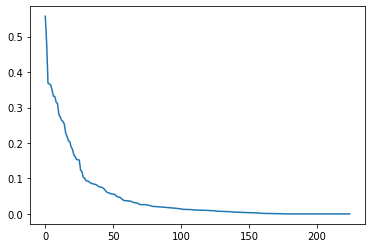

In [69]:
plt.plot(sorted(mutual_info_regression(preproc_transformer.fit_transform(X,y), y), reverse=True))

In [70]:
preproc_transformer = make_column_transformer(
    (preproc_numerical, feat_numerical),
    (preproc_ordinal, feat_ordinal),
    (preproc_nominal, feat_nominal),
    remainder='drop')

preproc_selector = SelectPercentile(mutual_info_regression, percentile=25)

preproc = make_pipeline(
    preproc_transformer,
    preproc_selector
)

preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars',
                                                   'Gara...
                                                   'Condition2', 'Electrical',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'Foundation', 'Functional',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LandContour',
                                                   'LotConfig', 'MSZoning',
                                                   'MasVnrType', 'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=25,
                                  score_func=<function mutual_info_regression at 0x7f41421c2290>))])

In [71]:
preprocessed = preproc.fit_transform(X,y)

In [72]:
feature_names = preproc.get_feature_names_out()

clean_feature_names = [name.split('__')[-1] for name in feature_names]

pd.DataFrame(preprocessed, columns=clean_feature_names)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,...,MSZoning_RL,MSZoning_RM,MasVnrType_None,MasVnrType_Stone,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,SaleCondition_Partial,SaleType_New
0,0.119780,0.413559,0.375,0.125089,0.064212,0.000000,0.666667,0.386460,0.50,0.936364,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.212942,0.000000,0.375,0.173281,0.121575,0.333333,0.666667,0.324401,0.50,0.690909,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.134465,0.419370,0.375,0.086109,0.185788,0.333333,0.666667,0.428773,0.50,0.918182,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.143873,0.366102,0.375,0.038271,0.231164,0.333333,0.333333,0.452750,0.75,0.890909,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.186095,0.509927,0.500,0.116052,0.209760,0.333333,0.666667,0.589563,0.75,0.909091,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.142038,0.336077,0.375,0.000000,0.407962,0.333333,0.666667,0.324401,0.50,0.900000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.399036,0.000000,0.375,0.139972,0.252140,0.666667,0.666667,0.352609,0.50,0.709091,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.195961,0.557869,0.500,0.048724,0.375428,0.666667,0.666667,0.177715,0.25,0.372727,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.170721,0.000000,0.250,0.008682,0.000000,0.000000,0.333333,0.169252,0.25,0.454545,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### VarianceThreshold

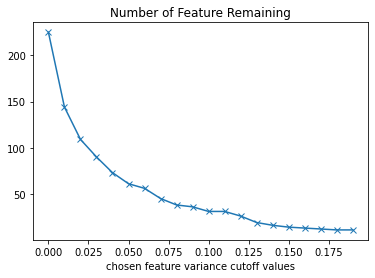

In [37]:
# def number_feature_remaining(cutoff=0):
#     preproc_transformer = make_column_transformer(
#         (preproc_numerical, feat_numerical),
#         (preproc_ordinal, feat_ordinal),
#         (preproc_nominal, feat_nominal),
#         remainder="drop")

#     preproc_selector = VarianceThreshold(cutoff)

#     preproc = make_pipeline(
#         preproc_transformer,
#         preproc_selector)

#     return preproc.fit_transform(X).shape[1]

# cutoff_values = np.arange(0, 0.2, 0.01)
# plt.plot(cutoff_values, [number_feature_remaining(t) for t in cutoff_values], marker='x')
# plt.xlabel("chosen feature variance cutoff values")
# plt.title("Number of Feature Remaining");

In [38]:
# preproc_selector = VarianceThreshold(0.025)

# preproc = make_pipeline(preproc_transformer,
#                         preproc_selector)

# preproc.fit_transform(X,y).shape

(1460, 96)

### Pearson/Spearman correlations

### Cyclical features

## Target engineering

## Model Iteration

In [63]:
X['MSSubClass'].value_counts(dropna=False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64